# データサイエンス第11回
## データ分析（判別分析）

In [ ]:
# 必要に応じて次の行のコメントアウトを解除し，ライブラリをインストールしてください
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
import scipy.stats as stats
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline 

### Penguins データセット

/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_3543/1005413586.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = penguins['species'].replace({


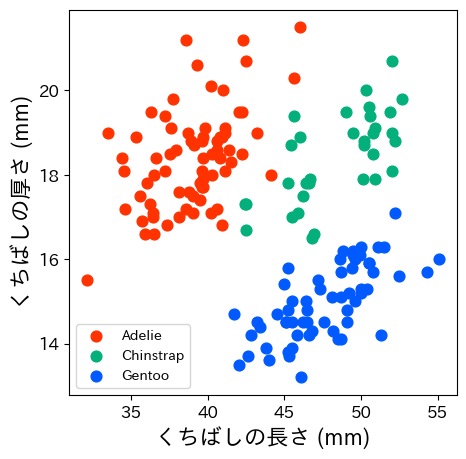

In [3]:
penguins = sns.load_dataset('penguins').dropna()
 
X = penguins[['bill_length_mm', 'bill_depth_mm']].values
y = penguins['species'].replace({
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
}).values

sp = ['Adelie', 'Chinstrap', 'Gentoo']
color = ["#FF3200", "#03AF7A", "#005AFF"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.figure(figsize=(5, 5))

distance = []
species = np.unique(y_train)
for i in species:
    points = X_train[y_train == i]
    plt.scatter(points[:, 0], points[:, 1], s=60, c=color[i], label=sp[i])
    
plt.tick_params(labelsize=12)
plt.xlabel('くちばしの長さ (mm)', fontsize=16)
plt.ylabel('くちばしの厚さ (mm)', fontsize=16)
plt.legend(fontsize=10)
plt.show()

### 最近傍法

新しい点は、k=1 の最近傍法に基づき、クラス 2 に属すると判定されました


<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:23: SyntaxWarning: invalid escape sequence '\o'
/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_3543/1375761261.py:23: SyntaxWarning: invalid escape sequence '\o'
  plt.scatter(points[:, 0], points[:, 1], s=60, c=color[i], label=f"クラス{i}（$\omega_{i}$）")


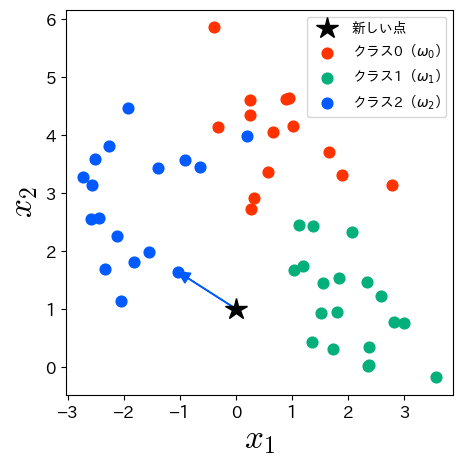

In [4]:
X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    random_state=0)

color = ["#FF3200", "#03AF7A", "#005AFF"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 新しい点の座標
new_x = 0
new_y = 1

plt.figure(figsize=(5, 5))
plt.plot(new_x, new_y, "*k", markersize=16, label="新しい点") 

distance = []
species = np.unique(y_train)
for i in species:
    points = X_train[y_train == i]
    plt.scatter(points[:, 0], points[:, 1], s=60, c=color[i], label=f"クラス{i}（$\omega_{i}$）")
    for j, xt in enumerate(points):
        distance.append((i, j, (xt[0] - new_x) ** 2 + (xt[1] - new_y) ** 2))

distance = sorted(distance, key=lambda x: x[2])

k = 1
nearest_classes = []
for idx in range(k):
    i, j, d = distance[idx]
    nearest_point = X_train[y_train == i][j]
    nearest_classes.append(i)  # クラスを記録
    plt.arrow(new_x, new_y, nearest_point[0] - new_x, nearest_point[1] - new_y, 
             color=color[i], width=0.01, head_width=0.2, head_length=0.2, length_includes_head=True)

class_count = {}
for cls in nearest_classes:
    if cls not in class_count:
        class_count[cls] = 0
    class_count[cls] += 1

predicted_class = max(class_count, key=class_count.get)

print(f"新しい点は、k={k} の最近傍法に基づき、クラス {predicted_class} に属すると判定されました")

plt.tick_params(labelsize=12)
plt.xlabel(r'$x_1$', fontsize=24, math_fontfamily='cm')
plt.ylabel(r'$x_2$', fontsize=24, math_fontfamily='cm')
plt.legend(fontsize=10)
plt.show()

### k 近傍法（kNN）

新しい点は、k=5 の最近傍法に基づき、クラス 1 に属すると判定されました


<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:23: SyntaxWarning: invalid escape sequence '\o'
/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_3543/1051306888.py:23: SyntaxWarning: invalid escape sequence '\o'
  plt.scatter(points[:, 0], points[:, 1], s=60, c=color[i], label=f"クラス{i}（$\omega_{i}$）")


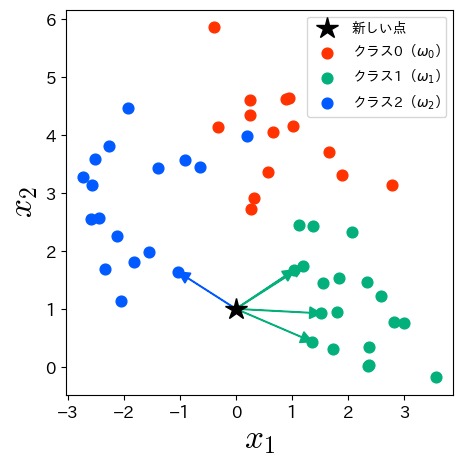

In [5]:
X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    random_state=0)

color = ["#FF3200", "#03AF7A", "#005AFF"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 新しい点の座標
new_x = 0
new_y = 1

plt.figure(figsize=(5, 5))
plt.plot(new_x, new_y, "*k", markersize=16, label="新しい点") 

distance = []
species = np.unique(y_train)
for i in species:
    points = X_train[y_train == i]
    plt.scatter(points[:, 0], points[:, 1], s=60, c=color[i], label=f"クラス{i}（$\omega_{i}$）")
    for j, xt in enumerate(points):
        distance.append((i, j, (xt[0] - new_x) ** 2 + (xt[1] - new_y) ** 2))

distance = sorted(distance, key=lambda x: x[2])

k = 5
nearest_classes = []
for idx in range(k):
    i, j, d = distance[idx]
    nearest_point = X_train[y_train == i][j]
    nearest_classes.append(i)  # クラスを記録
    plt.arrow(new_x, new_y, nearest_point[0] - new_x, nearest_point[1] - new_y, 
             color=color[i], width=0.01, head_width=0.2, head_length=0.2, length_includes_head=True)

class_count = {}
for cls in nearest_classes:
    if cls not in class_count:
        class_count[cls] = 0
    class_count[cls] += 1

predicted_class = max(class_count, key=class_count.get)

print(f"新しい点は、k={k} の最近傍法に基づき、クラス {predicted_class} に属すると判定されました")

plt.tick_params(labelsize=12)
plt.xlabel(r'$x_1$', fontsize=24, math_fontfamily='cm')
plt.ylabel(r'$x_2$', fontsize=24, math_fontfamily='cm')
plt.legend(fontsize=10)
plt.show()

新しい点は、k=5 の最近傍法に基づき、Chinstrap に属すると判定されました


/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_3543/4127144763.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = penguins['species'].replace({


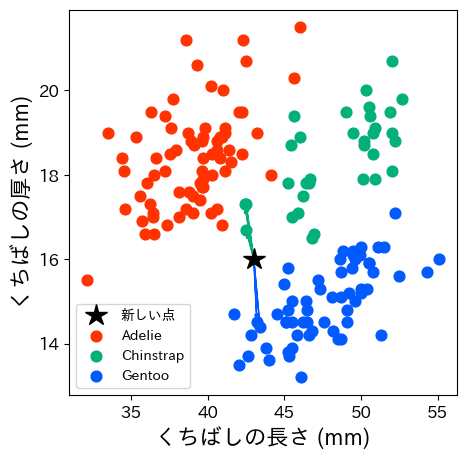

In [6]:
X = penguins[['bill_length_mm', 'bill_depth_mm']].values
y = penguins['species'].replace({
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
}).values

sp = ['Adelie', 'Chinstrap', 'Gentoo']
color = ["#FF3200", "#03AF7A", "#005AFF"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 新しい点の座標
new_x = 43
new_y = 16

plt.figure(figsize=(5, 5))
plt.plot(new_x, new_y, "*k", markersize=16, label="新しい点")

distance = []
species = np.unique(y_train)
for i in species:
    points = X_train[y_train == i]
    plt.scatter(points[:, 0], points[:, 1], s=60, c=color[i], label=sp[i])
    for j, xt in enumerate(points):
        distance.append((i, j, (xt[0] - new_x) ** 2 + (xt[1] - new_y) ** 2))

distance = sorted(distance, key=lambda x: x[2])

k = 5
nearest_classes = []
for idx in range(k):
    i, j, d = distance[idx]
    nearest_point = X_train[y_train == i][j]
    nearest_classes.append(i)
    plt.arrow(new_x, new_y, nearest_point[0] - new_x, nearest_point[1] - new_y, 
             color=color[i], width=0.01, head_width=0.2, head_length=0.2,length_includes_head=True)

class_count = {}
for cls in nearest_classes:
    if cls not in class_count:
        class_count[cls] = 0
    class_count[cls] += 1

predicted_class = max(class_count, key=class_count.get)

print(f"新しい点は、k={k} の最近傍法に基づき、{sp[predicted_class]} に属すると判定されました")

plt.tick_params(labelsize=12)
plt.xlabel('くちばしの長さ (mm)', fontsize=16)
plt.ylabel('くちばしの厚さ (mm)', fontsize=16)
plt.legend(fontsize=10)
plt.show()

<span style="font-size: 20px; color: #F08000;">例題1</span>

以下の特徴をもつペンギンはそれぞれどの種類だと推測されるか

k-NN法を用いて推測せよ

1. くちばしの長さ：45 mm，くちばしの厚さ：14 mm
2. くちばしの長さ：45 mm，くちばしの厚さ：16 mm
3. くちばしの長さ：45 mm，くちばしの厚さ：18 mm


新しい点は、k=5 の最近傍法に基づき、Gentoo に属すると判定されました


/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_3543/807505324.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = penguins['species'].replace({


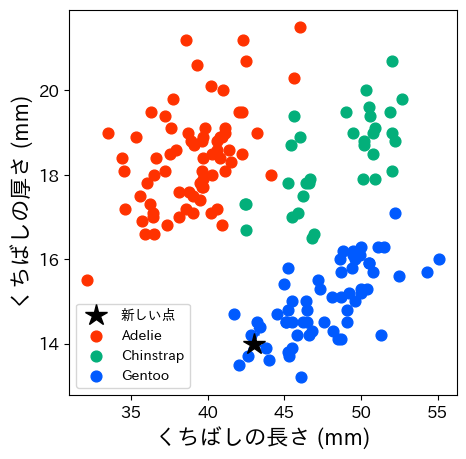

In [7]:
##############################
# 例題1のコードを記入
penguins = sns.load_dataset('penguins').dropna()

X = penguins[['bill_length_mm', 'bill_depth_mm']].values
y = penguins['species'].replace({
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
}).values

sp = ['Adelie', 'Chinstrap', 'Gentoo']
color = ["#FF3200", "#03AF7A", "#005AFF"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 新しい点の座標
new_x = 43
new_y = 14
# new_y = 16
# new_y = 18

plt.figure(figsize=(5, 5))
plt.plot(new_x, new_y, "*k", markersize=16, label="新しい点")

distance = []
species = np.unique(y_train)
for i in species:
    points = X_train[y_train == i]
    plt.scatter(points[:, 0], points[:, 1], s=60, c=color[i], label=sp[i])
    for j, xt in enumerate(points):
        distance.append((i, j, (xt[0] - new_x) ** 2 + (xt[1] - new_y) ** 2))

distance = sorted(distance, key=lambda x: x[2])

k = 5
nearest_classes = []
for idx in range(k):
    i, j, d = distance[idx]
    nearest_point = X_train[y_train == i][j]
    nearest_classes.append(i)
    plt.arrow(new_x, new_y, nearest_point[0] - new_x, nearest_point[1] - new_y, 
             color=color[i], width=0.01, head_width=0.2, head_length=0.2,length_includes_head=True)

class_count = {}
for cls in nearest_classes:
    if cls not in class_count:
        class_count[cls] = 0
    class_count[cls] += 1

predicted_class = max(class_count, key=class_count.get)

print(f"新しい点は、k={k} の最近傍法に基づき、{sp[predicted_class]} に属すると判定されました")

plt.tick_params(labelsize=12)
plt.xlabel('くちばしの長さ (mm)', fontsize=16)
plt.ylabel('くちばしの厚さ (mm)', fontsize=16)
plt.legend(fontsize=10)
plt.show()
##############################

### K-平均法（K-means）

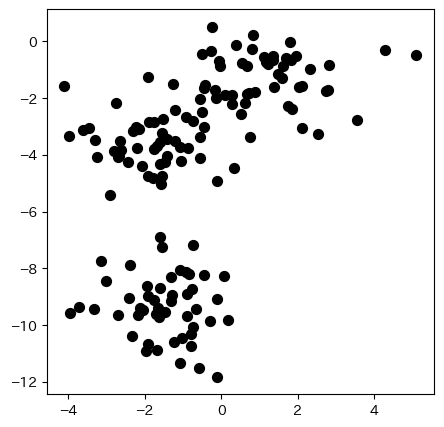

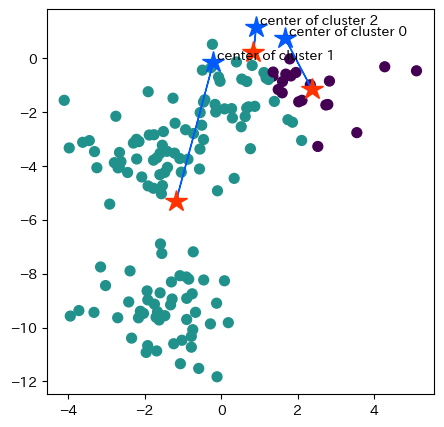

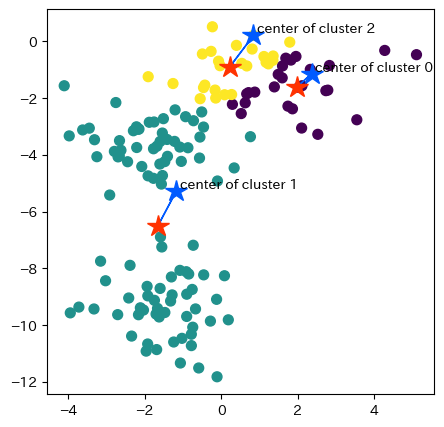

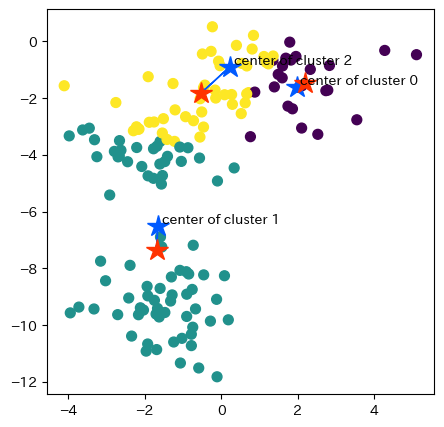

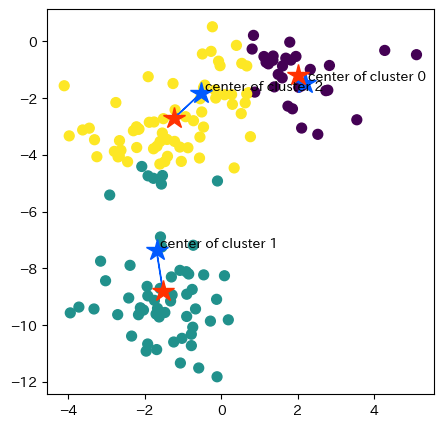

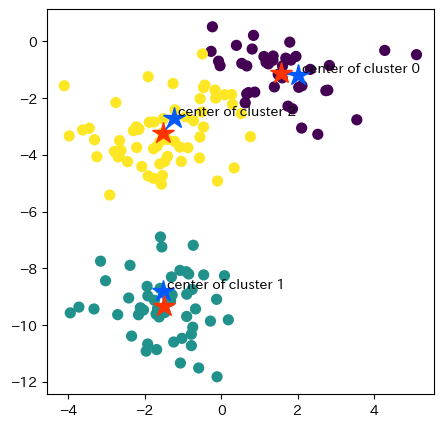

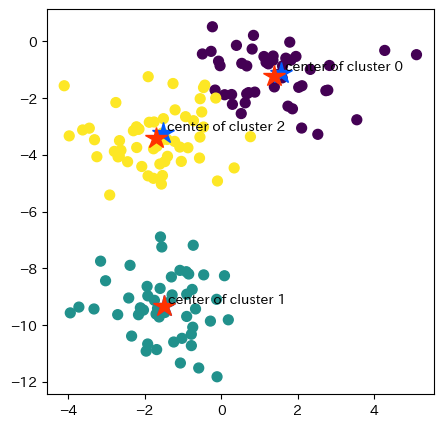

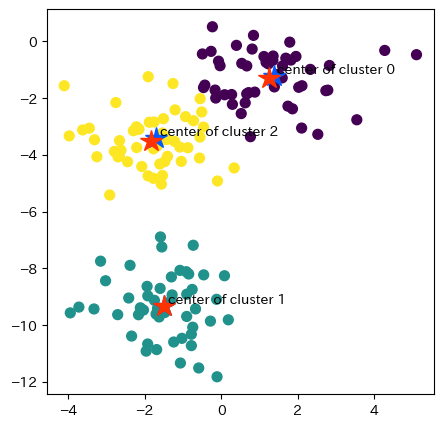

<Figure size 500x500 with 0 Axes>

In [8]:
N = 150
K = 3

np.random.seed(2024)

x, y = make_blobs(  
    n_samples=150,  
    n_features=2,
    centers=3, 
    cluster_std=1.0,
    random_state=2)
mu = np.random.multivariate_normal([0, 0], np.eye(2), K)

cls = np.zeros(N, dtype=int)

plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c="black", s=50)
# plt.savefig(f'kmeans_{0}.png')
for it in range(10):
    plt.figure(figsize=(5, 5))

    distance = [np.sum((x - mu[k,:])**2, axis=1) for k in range(K)]
    cls = np.argmin(distance, axis=0)
    new_mu = np.array([x[cls == k].mean(0) for k in range(K)])

    if max((np.sum((new_mu - mu)**2, axis=1))) < 1.0e-2:
        break

    plt.scatter(x[:, 0], x[:, 1], c = cls, s=50)
    for k in range(K):
        plt.text(mu[k, 0]+0.1, mu[k, 1]+0.1, 'center of cluster %d' % k)
        plt.plot(mu[k, 0], mu[k, 1], "*", color='#005AFF', markersize=16)
        plt.plot(new_mu[k, 0], new_mu[k, 1], "*", color='#FF3200', markersize=16)
        plt.arrow(mu[k, 0], mu[k, 1], new_mu[k, 0]-mu[k, 0], new_mu[k, 1]-mu[k, 1], color="#005AFF", width=0.01, length_includes_head=True,head_width=0.05, head_length=0.15)
    # plt.savefig(f'kmeans_{it+1}.png')

    mu = new_mu